In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("preprocessed_data.csv")

In [3]:
data.head()

,Unnamed: 0,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,1,s3,1,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,2,s6,1,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,3,s14,0,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,4,s8,0,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df = data.iloc[:,1:]

In [5]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,1,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,1,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,0,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,0,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


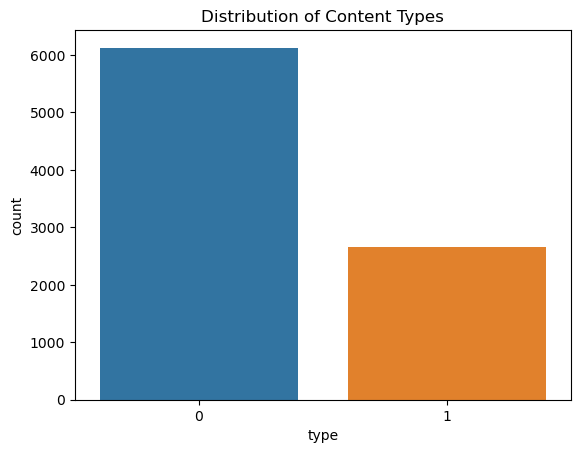

In [6]:
# 1. Bar Chart for Types of Content
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Types')
plt.show()

By this bar chart we can say that Movies(0) are more than Shows(1)

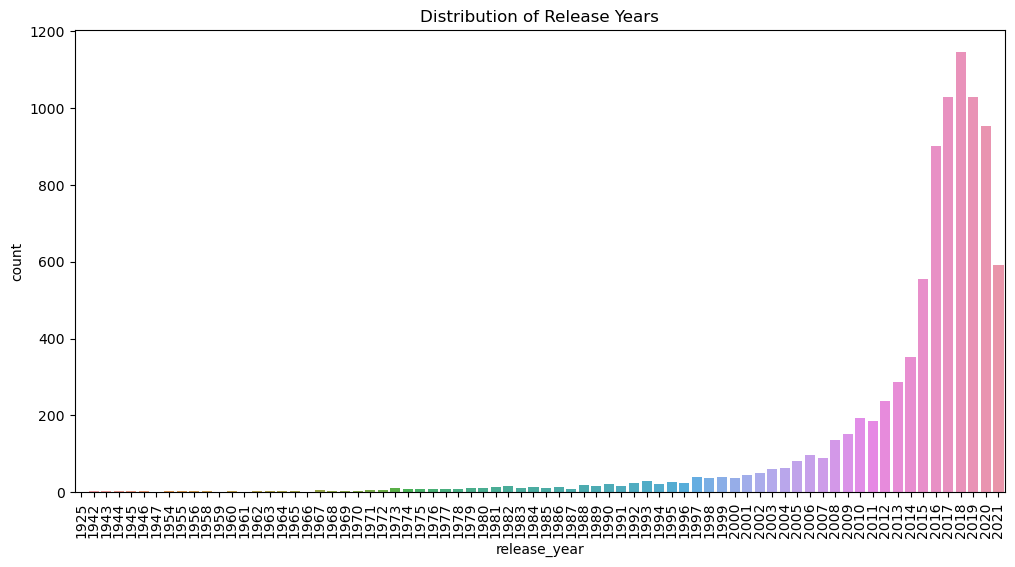

In [7]:
# 2. Bar Chart for Release Years
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=df)
plt.title('Distribution of Release Years')
plt.xticks(rotation=90)
plt.show()

By this Bar chart we can say that the intrest of movies and shows in people increased from 2000

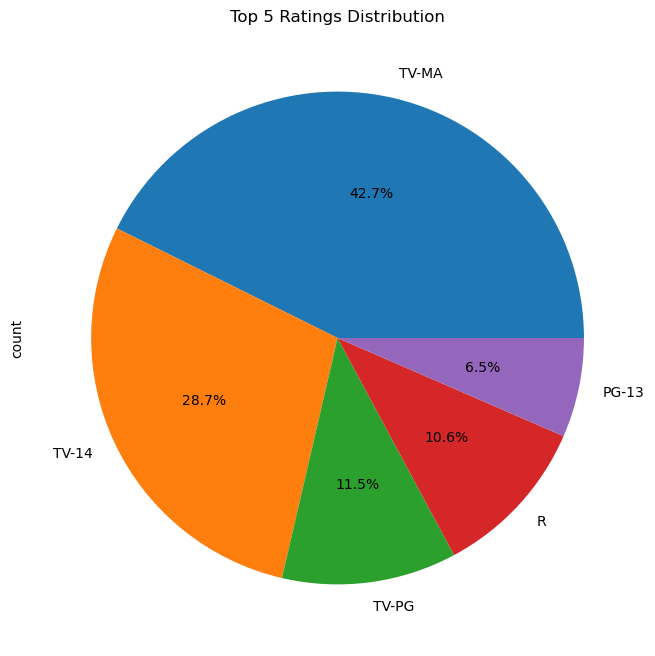

In [9]:
# Filter the DataFrame to include only the top 5 ratings
top_ratings = df['rating'].value_counts().nlargest(5)

# Plot the pie chart for the top 5 ratings
plt.figure(figsize=(8, 8))
top_ratings.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Ratings Distribution')
plt.show()

### insights:
1. Top 5 ratings are: Tv-Ma,PG-13,R,TV_PG,TV-14 and there corresponding share in total.


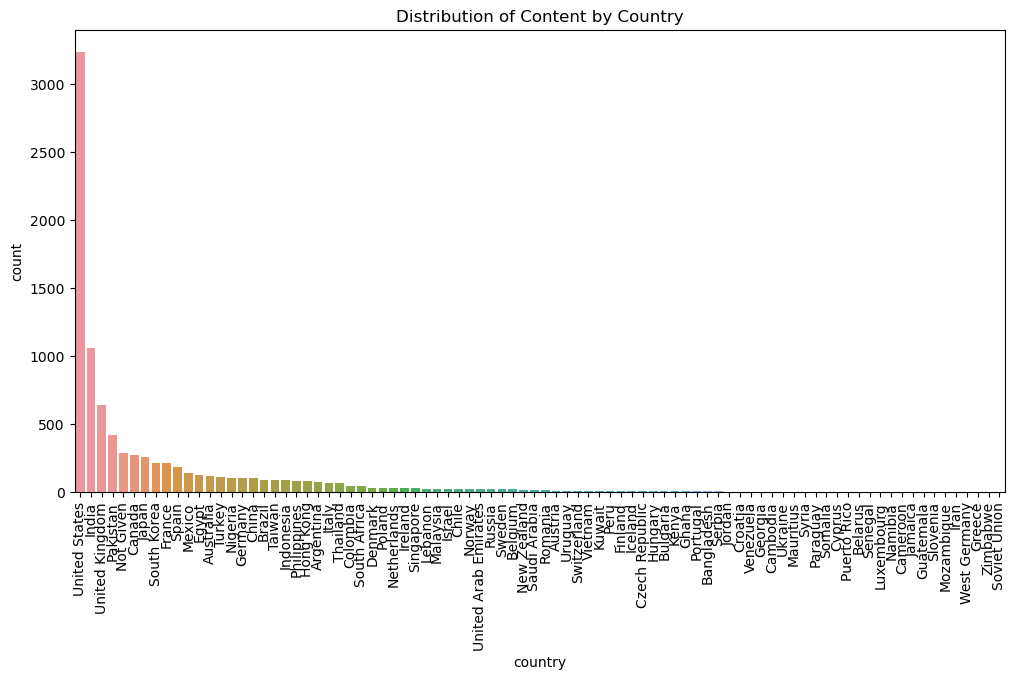

In [10]:
# 4. Bar Chart for Countries
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index)
plt.title('Distribution of Content by Country')
plt.xticks(rotation=90)
plt.show()

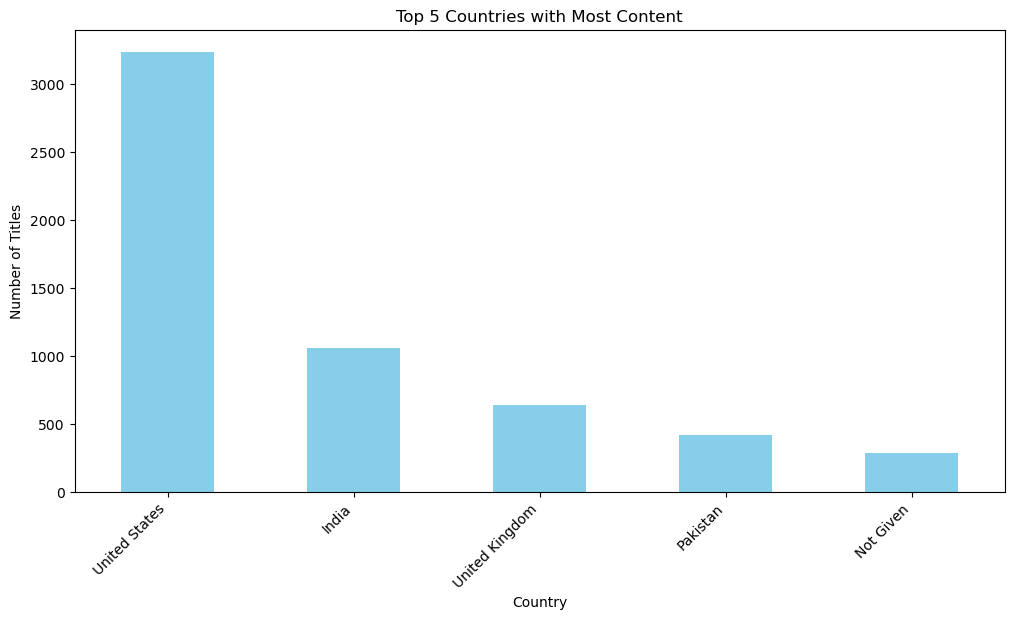

In [11]:
top_countries = df['country'].value_counts().nlargest(5)

# Plot the bar chart for the top 5 countries
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

### Insights:
1. from this we can list the most shows and movies come from : us,India, uk,pak

In [12]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,1,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,1,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,0,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,0,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


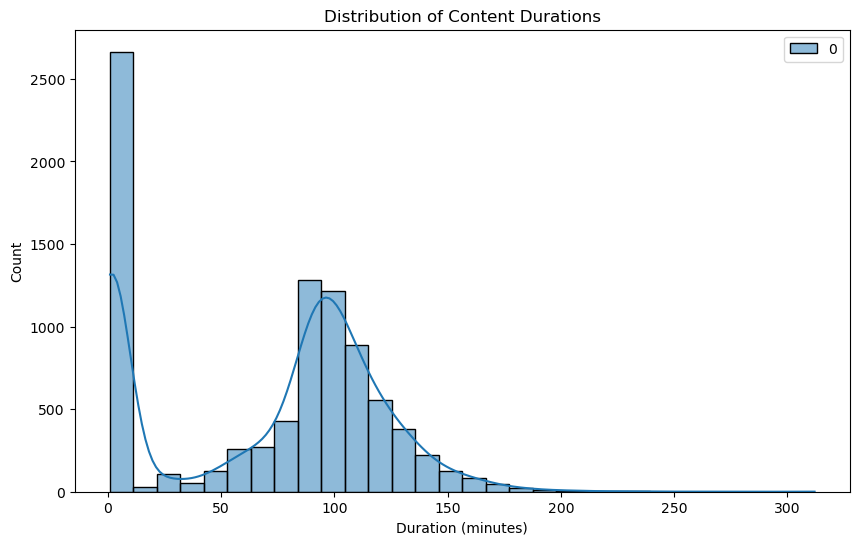

In [13]:
# 5. Histogram for Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'].str.extract('(\d+)').astype(float), bins=30, kde=True)
plt.title('Distribution of Content Durations')
plt.xlabel('Duration (minutes)')
plt.show()

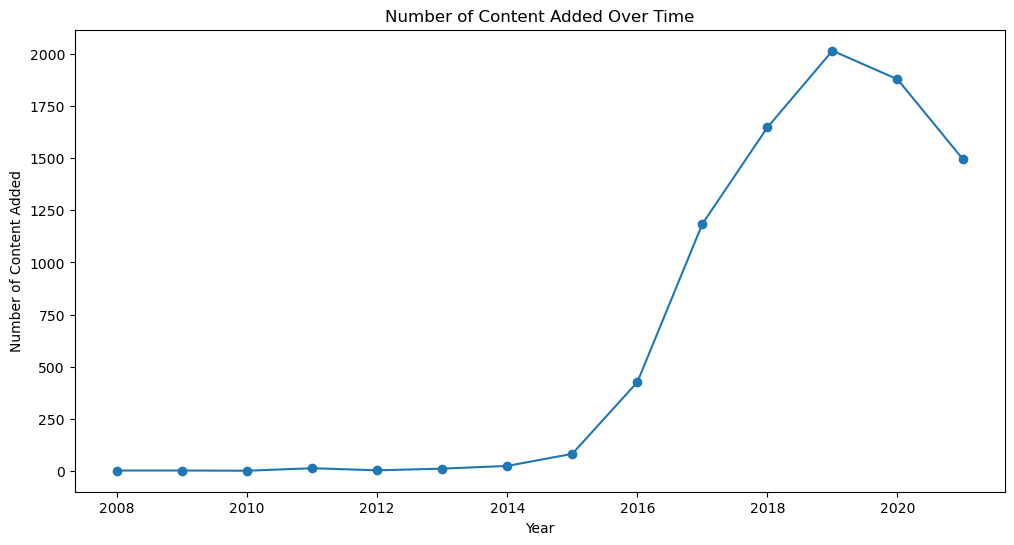

In [14]:
# 6. Line Chart for Date Added Over Time
df['date_added'] = pd.to_datetime(df['date_added'])
plt.figure(figsize=(12, 6))
df.groupby(df['date_added'].dt.year)['show_id'].count().plot(marker='o')
plt.title('Number of Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Content Added')
plt.show()

From this we can observe that after 2016 the content added grown exponetailly

In [16]:
pip install wordcloud

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.0 kB 1.9 MB/s eta 0:00:01
   --------- ------------------------------ 71.7/300.0 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 122.9/300.0 kB 1.4 MB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


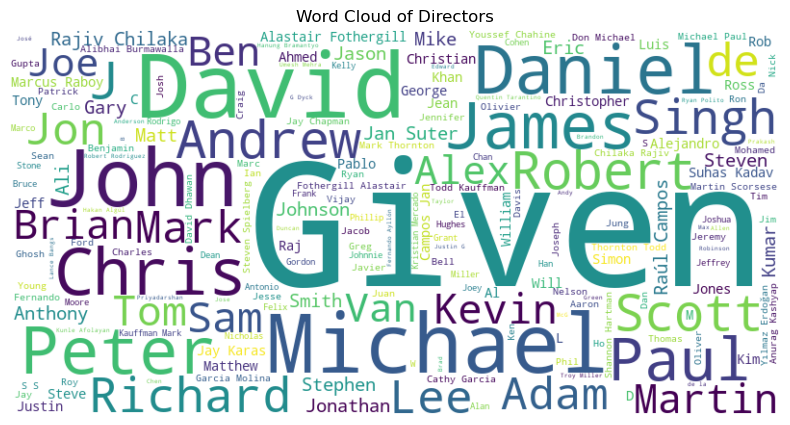

In [17]:

from wordcloud import WordCloud

directors_text = ' '.join(df['director'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(directors_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Directors')
plt.show()

From this we can gather the info like 
this are the names of director who directed more films:
1. Michael
2. David
3.Jhon and more